In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

### Task 1.1 Линейная регрессия

In [2]:
# Данные
A = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
B = np.array([1.0, 2.03, 3.01, 3.98, 5.04, 5.98, 7.02, 8.02, 8.99, 10.02])

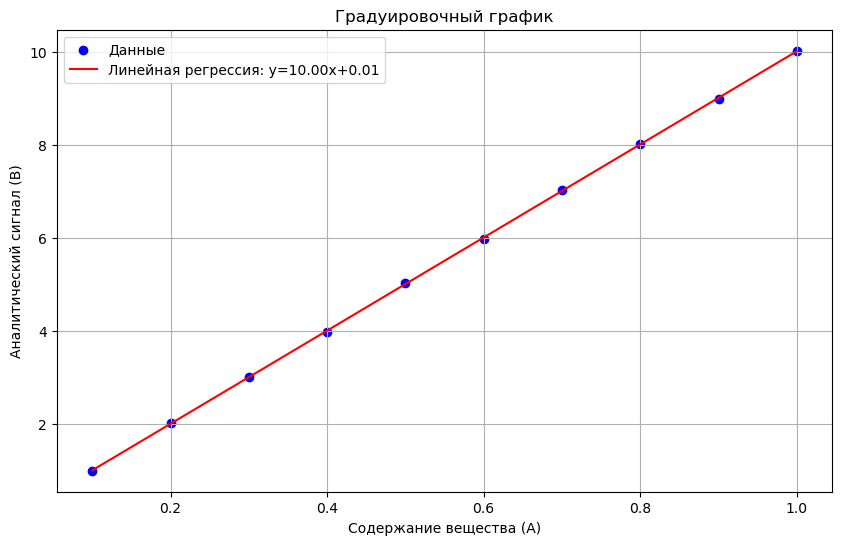

Уравнение линейной регрессии: y = 10.00x + 0.01
Коэффициент детерминации (R^2): 1.0000
Оценка содержания вещества при сигнале C1=1.87: C2 = 0.1861


In [3]:
# Построение градуировочного графика
plt.figure(figsize=(10, 6))
plt.scatter(A, B, label='Данные', color='blue')
plt.xlabel('Содержание вещества (A)')
plt.ylabel('Аналитический сигнал (B)')
plt.title('Градуировочный график')

# Линейная регрессия
slope, intercept, r_value, p_value, std_err = stats.linregress(A, B)
regression_line = slope * A + intercept

# Построение линии регрессии
plt.plot(A, regression_line, label=f'Линейная регрессия: y={slope:.2f}x+{intercept:.2f}', color='red')
plt.legend()
plt.grid(True)
plt.show()

# Коэффициент детерминации
r_squared = r_value ** 2
print(f"Уравнение линейной регрессии: y = {slope:.2f}x + {intercept:.2f}")
print(f"Коэффициент детерминации (R^2): {r_squared:.4f}")

# Оценка содержания вещества по величине сигнала C1=1.87
C1 = 1.87
C2 = (C1 - intercept) / slope
print(f"Оценка содержания вещества при сигнале C1=1.87: C2 = {C2:.4f}")

### Task 1.2 Линейная регрессия

In [4]:
# Данные
A = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
B = np.array([0.72, 0.82, 0.88, 1.04, 1.11, 1.19, 1.28, 1.40, 1.51, 1.62])

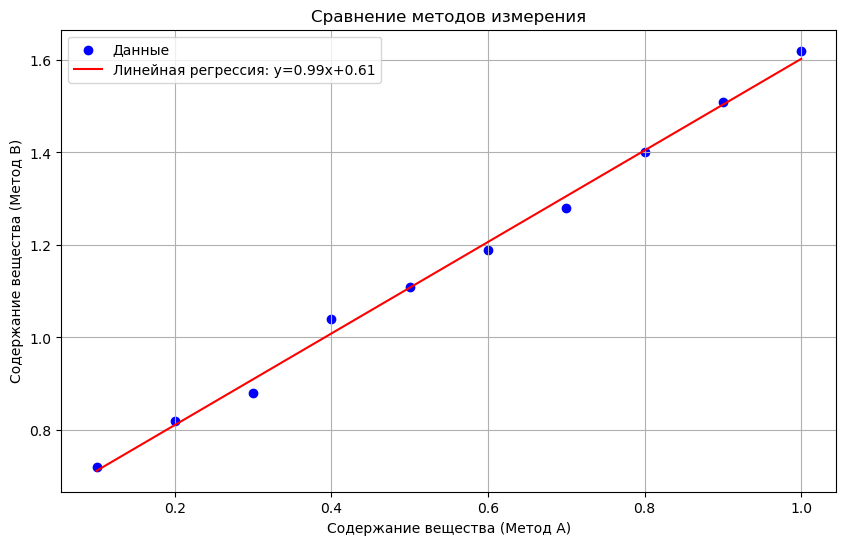

Уравнение линейной регрессии: y = 0.99x + 0.61
Коэффициент детерминации (R^2): 0.9959

t-статистика для проверки slope = 1: -0.4592
P-значение для проверки slope = 1: 0.6583

t-статистика для проверки intercept = 0: 44.0087
P-значение для проверки intercept = 0: 7.843e-11

Нет значимой линейной систематической ошибки между методами.
Есть значимая постоянная ошибка между методами.


In [5]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(A, B, label='Данные', color='blue')
plt.xlabel('Содержание вещества (Метод A)')
plt.ylabel('Содержание вещества (Метод B)')
plt.title('Сравнение методов измерения')

# Линейная регрессия
slope, intercept, r_value, p_value, std_err = stats.linregress(A, B)
regression_line = slope * A + intercept

# Построение линии регрессии
plt.plot(A, regression_line, label=f'Линейная регрессия: y={slope:.2f}x+{intercept:.2f}', color='red')
plt.legend()
plt.grid(True)
plt.show()

# Коэффициент детерминации
r_squared = r_value ** 2
print(f"Уравнение линейной регрессии: y = {slope:.2f}x + {intercept:.2f}")
print(f"Коэффициент детерминации (R^2): {r_squared:.4f}\n")

# Проверка значимого отклонения slope от 1
t_statistic_slope = (slope - 1) / std_err
df = len(A) - 2  # число степеней свободы для t-распределения
p_value_slope = 2 * (1 - stats.t.cdf(np.abs(t_statistic_slope), df=df))

print(f"t-статистика для проверки slope = 1: {t_statistic_slope:.4f}")
print(f"P-значение для проверки slope = 1: {p_value_slope:.4g}\n")

# Проверка значимого отклонения intercept от 0
standard_error_intercept = std_err * np.sqrt(np.mean(A**2))
t_statistic_intercept = intercept / standard_error_intercept
p_value_intercept = 2 * (1 - stats.t.cdf(np.abs(t_statistic_intercept), df=df))

print(f"t-статистика для проверки intercept = 0: {t_statistic_intercept:.4f}")
print(f"P-значение для проверки intercept = 0: {p_value_intercept:.4g}\n")

# Анализ систематических ошибок
alpha = 0.05
if p_value_slope < alpha:
    print("Есть значимая линейно изменяющаяся ошибка между методами.")
else:
    print("Нет значимой линейной систематической ошибки между методами.")

if p_value_intercept < alpha:
    print("Есть значимая постоянная ошибка между методами.")
else:
    print("Нет значимой постоянной ошибки между методами.")

### Task 1.3 Линейная регрессия

In [6]:
# Данные
A = np.array([0.5, 1, 0, 0.5, 1, 0, 0.5, 1, 0])
B = np.array([0, 0, 0, 0.5, 0.5, 0.5, 1, 1, 1])
C = np.array([99.53, 98.91, 100.11, 98.96, 98.44, 99.5, 98.41, 98.08, 98.88])

In [7]:
# Матрица независимых переменных с добавленной константой
X = np.column_stack((np.ones(len(A)), A, B))

# Решение нормальных уравнений для получения коэффициентов
coefficients, residuals, rank, s = np.linalg.lstsq(X, C, rcond=None)
intercept, coef_A, coef_B = coefficients

print(f"Формула регрессии: C = {intercept:.2f} + {coef_A:.2f}*A + {coef_B:.2f}*B\n")

# Оценка ошибок
y_pred = X.dot(coefficients)
n = len(C)
p = len(coefficients)
df = n - p
residual_std_error = np.sqrt(np.sum((C - y_pred)**2) / df)
cov_matrix = np.linalg.inv(X.T.dot(X)) * residual_std_error**2
standard_errors = np.sqrt(np.diag(cov_matrix))

# t-статистики и p-значения
t_stats = coefficients / standard_errors
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df)) for t in t_stats]

print(f"t-статистики: {t_stats}")
print(f"P-значения: {p_values}\n")

alpha = 0.05
if p_values[1] < alpha:
    print("Примесь A значимо влияет на аналитический сигнал.")
else:
    print("Примесь A не значимо влияет на аналитический сигнал.")

if p_values[2] < alpha:
    print("Примесь B значимо влияет на аналитический сигнал.")
else:
    print("Примесь B не значимо влияет на аналитический сигнал.")

Формула регрессии: C = 100.02 + -1.02*A + -1.06*B

t-статистики: [1720.96212763  -14.32976292  -14.8917144 ]
P-значения: [0.0, 7.228103180434431e-06, 5.770201067623049e-06]

Примесь A значимо влияет на аналитический сигнал.
Примесь B значимо влияет на аналитический сигнал.


### Task 2.1 Нелинейная регрессия

In [8]:
# Данные
A = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
B = np.array([0.87, 1.35, 2.09, 3.24, 5.02, 7.78, 12.04, 18.64, 28.85, 44.66])

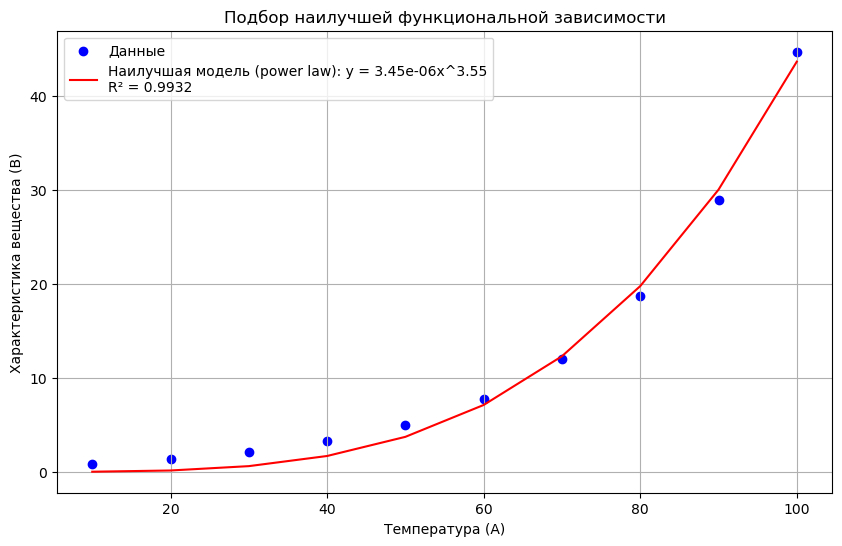

Наилучшая модель: power law
Уравнение: y = 3.45e-06x^3.55
Коэффициент детерминации (R²): 0.9932


In [9]:
# Определение функций для разных моделей
def parabolic(x, a, b, c):
    return a * x**2 + b * x + c

def power_law(x, a, b):
    return a * x**b

def exponential(x, a, b):
    return a * np.exp(b * x)

# Подгонка моделей
popt_parabolic, _ = curve_fit(parabolic, A, B)
popt_power, _ = curve_fit(power_law, A, B)
popt_exponential, _ = curve_fit(exponential, A, B)

# Предсказания для каждой модели
B_parabolic = parabolic(A, *popt_parabolic)
B_power = power_law(A, *popt_power)
B_exponential = exponential(A, *popt_exponential)

# Вычисление коэффициентов детерминации
r2_parabolic = r2_score(B, B_parabolic)
r2_power = r2_score(B, B_power)
r2_exponential = r2_score(B, B_exponential)

# Определение наилучшей модели
best_model_name = None
best_model_r2 = max(r2_parabolic, r2_power, r2_exponential)
if best_model_r2 == r2_parabolic:
    best_model_name = 'parabolic'
    best_model_formula = f'y = {popt_parabolic[0]:.2e}x^2 + {popt_parabolic[1]:.2e}x + {popt_parabolic[2]:.2e}'
    best_model_B = B_parabolic
elif best_model_r2 == r2_power:
    best_model_name = 'power law'
    best_model_formula = f'y = {popt_power[0]:.2e}x^{popt_power[1]:.2f}'
    best_model_B = B_power
elif best_model_r2 == r2_exponential:
    best_model_name = 'exponential'
    best_model_formula = f'y = {popt_exponential[0]:.2e}e^({popt_exponential[1]:.2e}x)'
    best_model_B = B_exponential

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(A, B, label='Данные', color='blue')
plt.plot(A, best_model_B, label=f'Наилучшая модель ({best_model_name}): {best_model_formula}\nR² = {best_model_r2:.4f}', color='red')
plt.xlabel('Температура (A)')
plt.ylabel('Характеристика вещества (B)')
plt.title('Подбор наилучшей функциональной зависимости')
plt.legend()
plt.grid(True)
plt.show()

# Вывод результатов
print(f"Наилучшая модель: {best_model_name}")
print(f"Уравнение: {best_model_formula}")
print(f"Коэффициент детерминации (R²): {best_model_r2:.4f}")

### Task 2.2 Нелинейная регрессия

In [10]:
# Данные
A = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
B = np.array([0.49, 0.65, 0.77, 0.87, 0.95, 1.03, 1.09, 1.16, 1.21, 1.27])

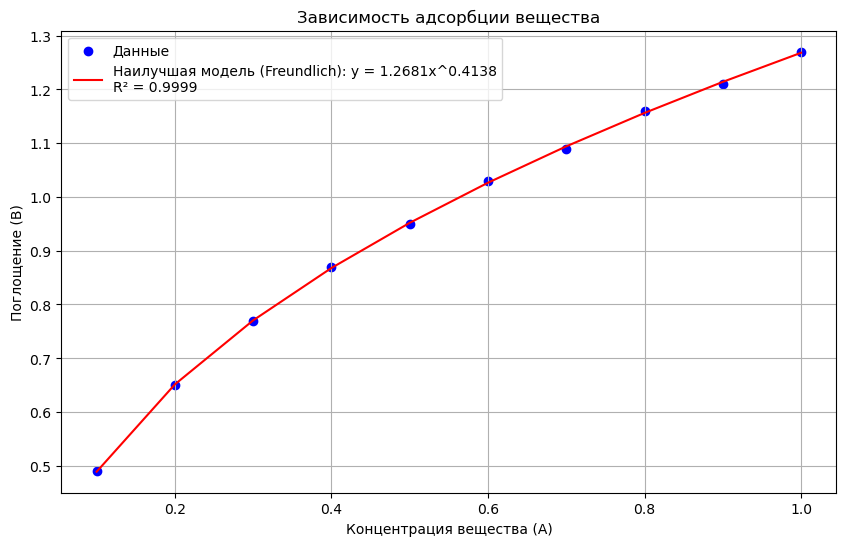

Наилучшая модель: Freundlich
Уравнение: y = 1.2681x^0.4138
Коэффициент детерминации (R²): 0.9999
Оцененные коэффициенты: [1.26809761 0.41377752]


In [11]:
# Определение функций для моделей
def langmuir_isotherm(x, a, b):
    return x / (a * x + b)

def freundlich_isotherm(x, a, b):
    return a * x**b

# Подгонка моделей
popt_langmuir, _ = curve_fit(langmuir_isotherm, A, B)
popt_freundlich, _ = curve_fit(freundlich_isotherm, A, B)

# Предсказания для каждой модели
B_langmuir = langmuir_isotherm(A, *popt_langmuir)
B_freundlich = freundlich_isotherm(A, *popt_freundlich)

# Вычисление коэффициентов детерминации
r2_langmuir = r2_score(B, B_langmuir)
r2_freundlich = r2_score(B, B_freundlich)

# Определение наилучшей модели
best_model_name = None
best_model_r2 = max(r2_langmuir, r2_freundlich)
if best_model_r2 == r2_langmuir:
    best_model_name = 'Langmuir'
    best_model_formula = f'y = x / ({popt_langmuir[0]:.4f}x + {popt_langmuir[1]:.4f})'
    best_model_B = B_langmuir
    best_model_params = popt_langmuir
elif best_model_r2 == r2_freundlich:
    best_model_name = 'Freundlich'
    best_model_formula = f'y = {popt_freundlich[0]:.4f}x^{popt_freundlich[1]:.4f}'
    best_model_B = B_freundlich
    best_model_params = popt_freundlich

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(A, B, label='Данные', color='blue')
plt.plot(A, best_model_B, label=f'Наилучшая модель ({best_model_name}): {best_model_formula}\nR² = {best_model_r2:.4f}', color='red')
plt.xlabel('Концентрация вещества (A)')
plt.ylabel('Поглощение (B)')
plt.title('Зависимость адсорбции вещества')
plt.legend()
plt.grid(True)
plt.show()

# Вывод результатов
print(f"Наилучшая модель: {best_model_name}")
print(f"Уравнение: {best_model_formula}")
print(f"Коэффициент детерминации (R²): {best_model_r2:.4f}")
print(f"Оцененные коэффициенты: {best_model_params}")